## Term Project: World Happiness, Wealth Disparities, and Sustainability Development Progress
### An Analysis of the World Happiness Report and Sustainability Development Report: 2015-2022

Jared Bendavid

DATA 22700 FALL 2023

# Introduction

####    One might expect that recent years, riddled with political upheavals, climate catastrophes, a pandemic, and other frightful circumstances, would show an overwhelming decline in happiness. Perhaps as a blatant acknowledgement of these trends or as a preeminent attempt to mititage their exacerbation, happiness has become a topic of particular interest to the world. Indeed, newspaper stories, internet searches, academic research, books, and many other forms of media have showed a sustained increase in reports on this veritable white whale (The World Happiness Report). It seems that we are keen on subjecting what has been the object of human pursuit since our advent to the rigid methods and philosopy of science--how, given the world's trends today, and their degree of global transparency, do we remain "happy"? What dimensions of our lives and our societies must be reevaluated and improved for us to be "happier"? 

#### The conditions for happiness, presumed to be synonymous with well-being, are defined even by ancient philosophers; Aristotle, for example, argued that one who has sufficient character virtues and external goods, has achieved εὐδαιμονία, or condition of good spirit. What modern sensibilities have decided upon is that key factors to well-being around the world include the following: 
1. Physical and mental health

2. Human relationships (in the family, at work, and in the community)

3. Income and employment

4. Physical and mental health

5. Character virtues, including pro-sociality and trust

6. Personal freedom

7. Lack of corruption

8. Effective government

#### The World Happiness Report has been quantifying these dimensions since 2012, asking people all over the world whether they are satisfied with their lives and what components bear the greatest weight in their determination. As well-being and happiness has attracted much attention and has become a primary facet in policy generation, the report proves invaluable.

#### Along with a sharpened attention for increasing happiness, we have also taken interest in developing our nations more sustainably. The United Nation's Global Sustainable Development Report aims to quantify global progress with respect to various dimensions of sustainable development (SDGs or Sustainable Development Goals):  gender equality, clean water and sanitation, qualitfy education, climate action, life on land and below water, etc. These two reports beg the question of whether a nation's sustainable development,spefifically on the dimension of climate action, has a bearing on the nation's happiness.

#### Therefore, my analysis aims to glean three things from these data: 

1. The trend of global happiness since 2015,

2. How national income, as proxied by GDP, affects happiness, and 

3. The relationship between sustainability development progress, as proxied by SDG progress, and,specifically, whether a country's income and happiness influence its renewable energy output.

In [85]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from IPython.display import display, Markdown
import matplotlib.animation as animation
from ipywidgets import Dropdown, Output, interactive, Layout
import geopandas as gpd
from IPython.display import display, clear_output, HTML
from folium.plugins import MarkerCluster


%matplotlib inline
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["savefig.dpi"] = 100

sns.set(rc={"figure.dpi":100, 'savefig.dpi':100})
sns.set_context('notebook')
sns.set_style("ticks")


# Data Cleaning

#### All happiness data referenced is sourced from the World Happiness Reports from 2015 to 2022. Data relating GDP per capita by country is sourced from the National Bank's archives, data regarding SDGs is sourced from the Sustainable Development Report, and data on energy consumption and output by fuel type is sourced from the Energy Institute's Stastical Review of World Energy. The World Happiness Report details each surveyed country's happiness score and the degree to which that score is explained by certain dimensions, such as GDP, life expectancy, etc. Similarly, the Sustainable Development Report provides quantified progress on spefific SDGs outlined by the United Nations. Lastly, the World Energy report contains an extensive catalog of each country's energy consumption and output, sorted by fuel type. All data processing can be viewed below.

In [86]:
h2015 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2015.csv')
h2016 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2016.csv')
h2017 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2017.csv')
h2018 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2018.csv')
h2019 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2019.csv')
h2020 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2020.csv')
h2021 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2021.csv')
h2022 = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/2022.csv')

happiness_data = [h2015,h2016,h2017,h2018,h2019,h2020,h2021,h2022]
years = [2015,2016,2017,2018,2019,2020,2021,2022]

for i,df in enumerate(happiness_data):
    df['year'] = years[i]

In [87]:
h2015.rename(columns = {'Happiness Rank': 'RANK',
                        'Happiness Score': 'SCORE',
                        'Economy (GDP per Capita)': 'GDP_per_cap',
                        'Standard Error': 'SE',
                        'Health (Life Expectancy)': 'life_expectancy'
                        }, inplace = True)

country_regions = h2015[['Country', 'Region']]
country_region_dict = country_regions.set_index("Country").to_dict()['Region']

h2016.rename(columns = {'Happiness Rank': 'RANK',
                        'Happiness Score': 'SCORE',
                        'Economy (GDP per Capita)': 'GDP_per_cap',
                        'Health (Life Expectancy)': 'life_expectancy'}, inplace = True)
h2016['SE'] = h2016.SCORE.apply('sem')

h2017.columns = h2017.columns.str.replace('.', ' ')
h2017.rename(columns = {'Happiness Rank': 'RANK',
                        'Happiness Score': 'SCORE',
                        'Whisker high': 'upperwhisker',
                        'Whisker low':'lowerwhisker',
                        'Economy  GDP per Capita ': 'GDP_per_cap',
                        'Health  Life Expectancy ': 'life_expectancy',
                        'Trust  Government Corruption ':'Trust (Government Corruption)'
                        }, inplace = True)
h2017['SE'] = h2017.SCORE.apply('sem')
h2017['Region'] = h2017.Country.map(country_region_dict)

h2018.rename(columns = {'Overall rank': 'RANK', 'Score': 'SCORE',
                        'Country or region':'Country',
                        'GDP per capita': 'GDP_per_cap',
                        'Healthy life expectancy': 'life_expectancy',
                        'Freedom to make life choices': 'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'
                        }, inplace = True)
h2018['Region'] = h2018['Country'].map(country_region_dict)
h2018['SE'] = h2018.SCORE.apply('sem')

h2019.rename(columns = {'Overall rank': 'RANK',
                        'Score': 'SCORE',
                        'Country or region': 'Country',
                        'GDP per capita': 'GDP_per_cap',
                        'Healthy life expectancy':'life_expectancy',
                        'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'
                        },
             inplace = True)
h2019['Region'] = h2019.Country.map(country_region_dict)
h2019['SE'] = h2019.SCORE.apply('sem')


h2020.rename(columns = {'Ladder score': 'SCORE',
                        'Regional indicator': 'Region',
                        'Logged GDP per capita': 'GDP_per_cap',
                        'Country name': 'Country',
                        'Standard error of ladder score': 'SE',
                        'Healthy life expectancy': 'life_expectancy',
                        'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)
h2020.sort_values(by = 'SCORE', inplace = True, ignore_index= True)
h2020['RANK'] = h2020.index + 1

h2021.rename(columns = {'Ladder score': 'SCORE',
                        'Regional indicator': 'Region',
                        'Logged GDP per capita': 'GDP_per_cap',
                        'Country name': 'Country',
                        'Standard error of ladder score': 'SE',
                        'Healthy life expectancy': 'life_expectancy',
                        'Freedom to make life choices':'Freedom',
                        'Perceptions of corruption':'Trust (Government Corruption)'}, inplace = True)
h2021.sort_values(by = 'SCORE', inplace = True, ignore_index= True)
h2021['RANK'] = h2021.index + 1

h2022.rename(columns = {'Happiness score': 'SCORE', 'Whisker-high': 'upperwhisker', 'Whisker-low':'lowerwhisker'}, inplace = True)
h2022['SCORE'] = h2022['SCORE'].str.replace(',', '.').astype(float)
h2022['year'] = h2022['year'].astype(int)

h2022['Region'] = h2022.Country.map(country_region_dict)

happiness_world = pd.concat([h2015,h2016,h2017,h2018,h2019,h2020,h2021, h2022], ignore_index = True)

happiness_world.drop(columns = ['upperwhisker', 'lowerwhisker', 'Upper Confidence Interval', 'Lower Confidence Interval'], inplace = True)


In [88]:
#get gdp
gdps = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5994720.csv', skiprows = [0,1,2,3])
gdps = gdps[['Country Name','2015','2016','2017','2018','2019','2020','2021','2022']]
gdps = gdps.melt(id_vars= 'Country Name',value_vars = ['2015','2016','2017','2018','2019','2020','2021','2022'])
gdps.rename(columns = {'Country Name': 'Country', 'variable':'year', 'value':'gdp'}, inplace= True)

for country in gdps.Country:
    if country not in happiness_world.Country.to_list():
        gdps = gdps[gdps['Country'] != country]
gdps.year = gdps.year.astype(int)
happiness_world = happiness_world.merge(gdps)

In [89]:
sdr_df = pd.read_excel('https://raw.githubusercontent.com/jbendavid/d227final_data/main/SDR2023-data.xlsx', sheet_name = 'Backdated SDG Index')[['Country','year','population','SDG Index Score', 'n_sdg7_renewcon']]
sdr_df = sdr_df.query('year >= 2015')
happiness_world = happiness_world.merge(sdr_df)

In [90]:
quartile_cutoffs_gdp = happiness_world.groupby('year')['gdp'].quantile([0.25, 0.5, 0.75]).unstack();
quartile_cutoffs_gdp.reset_index(inplace = True);
quartile_cutoffs_gdp.round();
quartile_cutoffs_gdp.astype(int);


quartile_cutoffs_hap = happiness_world.groupby('year')['SCORE'].quantile([0.25, 0.5, 0.75]).unstack();
quartile_cutoffs_hap.reset_index(inplace = True);

In [91]:
def income_level(year,gdp):
    cutoffs = quartile_cutoffs_gdp.loc[quartile_cutoffs_gdp.year == year,[0.25, 0.5, 0.75]].squeeze()
    if gdp <= cutoffs[0.25]:
        return 'Low Income'
    elif cutoffs[0.25] < gdp <= cutoffs[0.75]:
        return 'Middle Income'
    elif gdp > cutoffs[0.75]:
        return 'High Income'

def happiness_ranking(year, score):
    cutoffs = quartile_cutoffs_hap.loc[quartile_cutoffs_hap.year == year,[0.25, 0.5, 0.75]].squeeze()
    if cutoffs[0.50]<= score < cutoffs[0.75]:
        return 'Moderate Happiness'
    elif score >= cutoffs[0.75]:
        return 'High Happiness'

happiness_world['income_level'] = happiness_world.apply(lambda row: income_level(row['year'], row['gdp']), axis=1)
happiness_world['happiness_level'] = happiness_world.apply(lambda row: happiness_ranking(row['year'], row['SCORE']), axis=1)

In [94]:
energy_stats = pd.read_excel('https://github.com/jbendavid/d227final_data/raw/main/Statistical%20Review%20of%20World%20Energy%20Data.xlsx', sheet_name = 'Renewables Consumption - EJ', skiprows= [0,1])
energy_stats.drop(index = 0)
energy_stats = energy_stats.melt(id_vars= 'Exajoules (input-equivalent)',value_vars = [2015,2016,2017,2018,2019,2020,2021,2022])
energy_stats.rename(columns = {'Exajoules (input-equivalent)': 'Country', 'variable':'Year', 'value': 'renewable_product'}, inplace = True)

energy_stats.dropna(inplace = True)
energy_stats = energy_stats[energy_stats['Country'].isin(happiness_world['Country'])]

hap = happiness_world[['Country','year', 'SCORE', 'gdp', 'income_level', 'happiness_level']]
energy_stats_hap = energy_stats.merge(hap, how = 'right')

energy_stats_hap['renewable_product'] = energy_stats_hap['renewable_product']


# Visualizations

### Happiness Score and Proportion Explained by each Dimension (2015-2022)

In [96]:
coordinates = pd.read_csv('https://raw.githubusercontent.com/jbendavid/d227final_data/main/country-coord.csv')
coordinates = coordinates[['Country', 'Latitude (average)', 'Longitude (average)']]

happiness_world = happiness_world.merge(coordinates, on = 'Country')

components_dict = {'Happiness Score': 'SCORE',
              'GDP per Capita': 'GDP_per_cap',
              'Family': 'Family',
              'Trust': 'Trust (Government Corruption)',
              'Generosity': 'Generosity'}

years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
components = list(components_dict.keys())


In [97]:
# Function to add markers for each row in the DataFrame
def add_markers(row, selected_column, marker_cluster):
    selected_column = components_dict[selected_column]
    if selected_column == 'Generosity' or selected_column == 'Trust (Government Corruption)':
        multiplier = 10
    else:
        multiplier = 2
    folium.CircleMarker(
        location=[row['Latitude (average)'], row['Longitude (average)']],
        radius=row[selected_column] * multiplier,
        popup=f"{row['Country']} ({row['year']} - {selected_column}: {row[selected_column]} )",
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(marker_cluster)

# Function to update the map based on the selected column
def update_map(selected_column):
    clear_output(wait=True)  # Clear the existing output (map)

    mymap = folium.Map(location=[happiness_world['Latitude (average)'].mean(), happiness_world['Longitude (average)'].mean()], zoom_start=2)
    marker_cluster = MarkerCluster().add_to(mymap)

    # Apply the function to each row in the DataFrame
    happiness_world.apply(lambda row: add_markers(row, selected_column, marker_cluster), axis=1)

    # Display the map
    display(mymap)

layout = Layout(width = 'Auto')

# Create a dropdown for selecting the column
column_dropdown = Dropdown(
    options=components,
    value=components[0],
    description='Select Dimension of Happiness:',
    style = {'description_width': 'fit-content'},
    fontsize = 15
)

display(Markdown("<h1 style='text-align:center;'>Happiness Around the World</h1>"));
display(Markdown("<h2 style='text-align:left; font-size = 8px;'>Please select a Dimension of happiness you're interested in</h2>"));


# Create an interactive environment
interactive_map = interactive(update_map, selected_column=column_dropdown)

# Display the interactive environment

display(interactive_map)

<h1 style='text-align:center;'>Happiness Around the World</h1>

<h2 style='text-align:left; font-size = 8px;'>Please select a Dimension of happiness you're interested in</h2>

interactive(children=(Dropdown(description='Select Dimension of Happiness:', options=('Happiness Score', 'GDP …

**Figure 1:** Proportional symbol plot overlaid on a world map, depicting global happiness,by default. Upon clicking a cluster, users will be directed to select the specific country they are interested in and, in doing so, can view that country's score for the happiness dimension between 2015 and 2022. The display is customizable based on user input for subscores of the aggregate happiness score (Total Score, GDP per Capita, Family, Life Expectancy, Trust, Generosity).  This plot facilitates a spatiotemporal understanding of both overall happiness and its individual components.  Note that, as the report has changed several times over the past several years, some countries are missing data for some dimensions or years. Refer to the World Happiness Report for details on metric calculations. Source: The World Happiness Report.

#### Figure 1 provides a spatiotemportal understanding of happiness and its determining parts. From it, we are able to glean what components of national happiness countries cared most about in a given year. Particularly intersting is that in 2020 and 2021, largely characterized by the COVID-19 pandemic, several countries, including the United States, Canada, Germany, China, and India, seemed to have cared more about trust. In the context of the World Happiness Report, trust is primarily with regards to government integrity
#### While we can observe broad changes in happiness and a proxy for what each country cares about most in a given year, it is challenging to see a specific trend emerge. Figure 2 displays the global distribution of happiness from 2015 to 2022, showing an overall increase in happiness. 

## Distribution of Global Happiness Over Time (2015 - 2022)

In [98]:
sns.set(style='white')
happiness_world['year'] = happiness_world['year'].astype(int)

#calculate medians
medians = []
for year in years:
    medians.append(np.median(happiness_world[happiness_world.year == year][['SCORE']]))

# Create the figure and axis
fig, ax = plt.subplots(figsize = (5,5));

# Function to update the plot for each animation frame
def update(frame):
    ax.clear()
    current_year = years[frame]
    data_to_plot = happiness_world[happiness_world['year'] <= current_year]
    ax.hist(data_to_plot['SCORE'], color='cornflowerblue', edgecolor='k')
    ax.axvline(x=np.median(happiness_world.loc[happiness_world.year == current_year][['SCORE']]),ymin=0, ymax=27, linestyle = '--', color = 'black', label = 'median')
    ax.set_title(f'Distribution of Global Happiness for {current_year}', fontsize = 17)
    ax.set_xlabel('Happiness Score', fontsize = 15)
    ax.set_ylabel('Frequency', fontsize = 15)
    ax.set_xlim((0,8))
    ax.set_ylim((0,200))
    ax.legend(loc = 'upper left')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(years), repeat=True);

plt.close(fig)
# Display the animation
display(HTML(ani.to_jshtml()));

**Figure 2:** Animated histogram representing the distribution of happiness across the globe from 2015 to 2022. On the x-axis is the range of happiness scores (0-8) and on the y-axis is the frequency of observations. Displayed for each year is the median of the distribution. The medians of happiness are 5.212, 5.377, 5.3119, 5.404, 5.432, 5.608, 5.677, and 5.854 from 2015 to 2022, respectively. We see that the median across the seven years increases, while the distribution remains largely normal, suggesting that globally we are growing happier each year. Source: World Happiness Report.

### Does money really buy happiness? Happiness Density per National Income Bracket Over Time (2015-2022)

In [99]:
average_scores = happiness_world.groupby(['income_level','year' ])[['SCORE']].mean()
average_scores = average_scores.loc[['Low Income', 'Middle Income', 'High Income']]


Text(0.55, 0.99, 'Happiness Density per National Income Level')

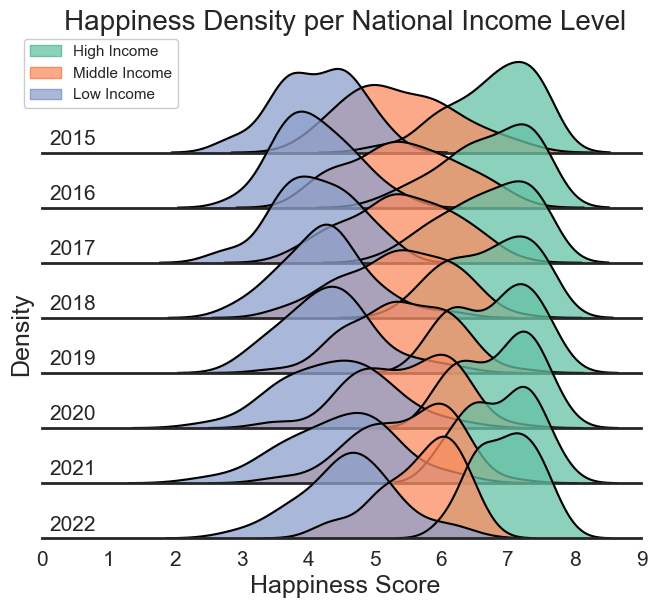

In [100]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2")
happiness_world['year'] = happiness_world['year'].astype('category')


g = sns.FacetGrid(happiness_world, palette=palette, row="year", hue="income_level", aspect=9.4, height=0.75, legend_out = True)
g.map_dataframe(sns.kdeplot, x="SCORE", fill=True, alpha=0.75)
g.map_dataframe(sns.kdeplot, x="SCORE", color='black')

for ax, year_label in zip(g.axes.flat, happiness_world['year'].cat.categories):
    ax.text(0.09, 0.12, year_label, transform=ax.transAxes, va='center', ha='right', fontsize=15)

g.fig.subplots_adjust(hspace=-.5)
g.set_titles("");
g.set(yticks=[], xlabel="");
g.set_ylabels("");
g.despine( left=True)
g.figure.subplots_adjust(left=0.12)


legend = plt.legend(['High Income','Middle Income','Low Income'],bbox_to_anchor=(0.24, 4.6),fontsize = 11, facecolor='white')
legend.get_frame().set_alpha(None)  # Ensure legend background is not transparent

g.figure.supylabel("Density", fontsize = 18, x = 0.075, y = 0.45);
g.figure.supxlabel("Happiness Score", fontsize = 18,x = 0.55);
g.set(xticks=list(range(10)), xticklabels=list(range(10)))
g.set(xlim=(0, 9))
plt.xticks(fontsize = 15);
plt.suptitle("Happiness Density per National Income Level", y = 0.99,x = 0.55, fontsize = 20)

**Figure 3:** Ridgeplot per year of the desnity of happiness scores across three national income brackets (low, middle, and high) per year. Income brackets are defined by the 25th, 50th, and 75th quartile values of GDP per capita. Countries with GDP per capita below the 25th quartile for that year were regarded as 'Low Income', those between the 25th and 75th quartile as 'Middle Income', and those above the 75th quartile as 'High Income'. The x-axis represents the range of happiness scores, while the y-axis represents the corresponding desnity distribution for each income bracket (from 0 to 0.5). The analysis reveals a discernable, direct proportionality beteween national income and happiness, suggesting that wealthier nations tend to report higher happiness scores. Source: The World Happiness Report and The World Bank.

In [101]:
average_scores

SCORE
income_level  year          
Low Income    2015  4.134939
              2016  4.106031
              2017  4.114563
              2018  4.251969
              2019  4.321469
              2020  4.397729
              2021  4.477613
              2022  4.625808
Middle Income 2015  5.389391
              2016  5.439683
              2017  5.395281
              2018  5.364190
              2019  5.403377
              2020  5.449318
              2021  5.469610
              2022  5.700060
High Income   2015  6.787515
              2016  6.719576
              2017  6.705485
              2018  6.742424
              2019  6.802364
              2020  6.869237
              2021  6.887500
              2022  6.967444

**Table 1:** Table showing the mean happiness score for countries grouped by year and income bracket.

#### Perhaps unexpectedly, there is an evident wealth disparity affecting happiness. Between the analyzed years, high income nations trended on the higher end of the happiness scale, with middle income and low income nations trailing behind. The distributions in Figure 3 reveal a convincing proportion between national income, as measured by GDP per capita, and happiness. Low income nations fall towards the very low end of the scale, high income nations on the upper end, and moderate income nations directly in between the two. The average happiness score per income bracket per year is also displayed in Table 1, to numerically represent the distribtuions seen in Figure 3. Again, it is evident that higher income nations report higher happiness consistently across the seven years analyzed here.

## Sustainable Development and Happiness

In [102]:
means = happiness_world.groupby(['Country'])[['SDG Index Score','SCORE']].mean()
r= means['SDG Index Score'].corr(means['SCORE'])

<ipython-input-103-30086dd1f74f>:13: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  bar = sns.barplot(x=weighted_avg_renewable.index.get_level_values('income_level'),


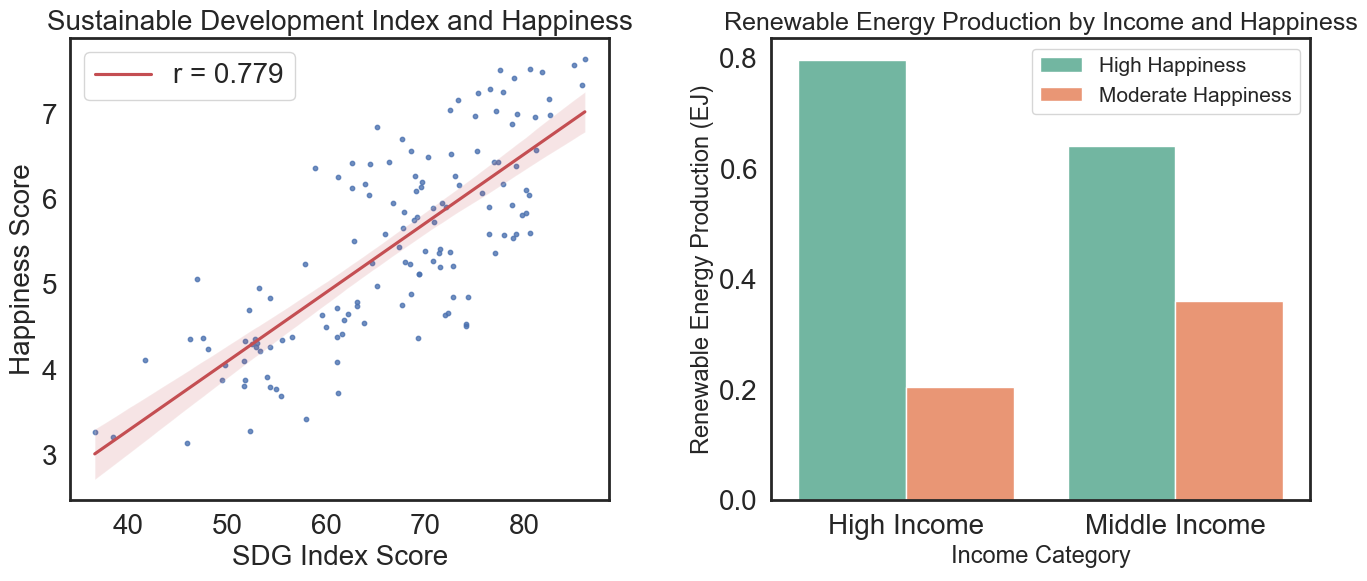

In [103]:
fig, axes = plt.subplots(1, 2, figsize = (16,6))
plt.tick_params(axis='both', which='major', labelsize=17)


# Filter out 'Low Income' for a balanced representation
filtered_data = energy_stats_hap.loc[energy_stats_hap['income_level'] != 'Low Income'].dropna(subset = ['renewable_product', 'happiness_level'])

# Calculate a weighted average of renewable energy production
weighted_avg_renewable = filtered_data.groupby(['income_level', 'happiness_level'])['renewable_product'].sum() / filtered_data.groupby('income_level')['renewable_product'].sum()


# Create the bar plot
bar = sns.barplot(x=weighted_avg_renewable.index.get_level_values('income_level'),
                  y=weighted_avg_renewable.values,
                  hue=weighted_avg_renewable.index.get_level_values('happiness_level'),
                  palette=sns.color_palette("Set2"),
                  ax=axes[1])
axes[1].set_title('Renewable Energy Production by Income and Happiness', fontsize=18)
axes[1].set_xlabel('Income Category', fontsize=17)
axes[1].set_ylabel('Renewable Energy Production (EJ)', fontsize=17)
axes[1].legend(loc='upper right', facecolor='white', fontsize = 15)


fig.subplots_adjust(wspace = 0.3)


regplot = sns.regplot(data=means, x="SDG Index Score", y="SCORE",
                      line_kws=dict(color="r", label=f"r = {round(r, 3)}"),
                      scatter_kws={'s': 10},
                      ax=axes[0], ci = 95)
axes[0].set_xlabel("SDG Index Score", fontsize=20)
axes[0].set_ylabel('Happiness Score', fontsize=20)
axes[0].set_title("Sustainable Development Index and Happiness", fontsize=20)
axes[0].legend(facecolor='white', fontsize = 20)

axes[0].tick_params(axis='both', which='both', labelsize=20)
axes[1].tick_params(axis='both', which='both', labelsize=20)
plt.show()

**Figure 4:** 

**Left panel:** Correlation between Sustainability Development Goal (SDG) Index and Happiness Score with a linear regression line (r = 0.78) surrounded by CI = 95%. Each data point represents the mean happiness and SDG score for each country, averaged across all years (2015 to 2022). This correlation demonstrates a positive association between a nation's advanced sustainable development progress and their happiness. Source: The World Happiness Report and SDG Index Report

**Right panel:** Side-by-side bar plot displaying the weighted average of renewable energy production for high income and middle income countries, sorted by their happiness ranking. Weighted averages were calculated by summing renewable energy output in exojoules (EJ) per happiness and income category and dividing by the total number of countries per respective income bracket. Note that low income and low happiness data are not presented due to the absence of distinguishable instances in the sorted data. Happiness brackets are defined by the 50th and 75th quartile values of a country's happiness scores. Countries with a happiness score between the 50th and 75th quartile are labeled as 'Moderate Happiness', and those above the 75th quartile are labeled as 'High Happiness'. Please refer to Figure 3 for the calculations behind income bracket distinctions. Source: Statistical Report of World Energy and The World Happiness Report and The World Bank.

#### The last aim of this analysis, to examine the relationship between happiness and sustainable development progress, utilizes the United Nation's sustainable development progress index and the Energy Institute's statistical review of world energy. It should be noted that the Energy Institute defines as 'gross generation from renewable sources including wind, geothermal, solar, biomass and waste, and not accounting for cross-border electricity supply.' The left panel of Figure 4 shows a correlation of 0.78 between sustainable development progress score and happiness, suggesting that as a nation achieves its sustainable development goals, its overall happiness increases. As the SDG index is a broad metric, the right panel of Figure 4 specifically examines the relationship between national income, as measured, again, by GDP per capita. It seems that happier countries use more renewable energy sources, regardless of national income bracket. Specifically, for the high income bracket, the weighted average of renewable energy output was 0.7953 and 0.2049 for high and moderate happiness, respectively. For the middle income bracket, the weighted average of renewable energy output was 0.640 and 0.360 for high and moderate happiness, respectively.

## Conclusions

#### As happiness has become such an area of concern across domains, as have sustainability initiatives and the energy transition, these data provide a national well-being incentive to develop nations more sustainably and cleanly. Happiness around the world has been increasing over the years, and while this is attributed to a number of reasons--as suggested by the number of dimensions in the World Happiness Report--each country appears to care about some things more than others (GDP per capita, family, life expectancy, etc.). What is clear, however, is that nations with a larger GDP per capita tend to be happier, against the point of the old adage that money cannot buy happiness. What's more is that happiness tends to increase as a nation fulfills its sustainable development goals (SDGs). Spefically, across high and middle national income brackets, countries that report greater happiness have a greater renewable energy output, suggesting that happier countries--income notwithstanding--show greater engagement in the energy transition than less happy countries. 

## References: 

Institute, E. (n.d.). Home. Statistical review of world energy. https://www.energyinst.org/statistical-review 


Sustainable development report 2023. Sustainable Development Report 2023. (n.d.). https://dashboards.sdgindex.org/ 


World happiness report data dashboard. The World Happiness Report. (n.d.). https://worldhappiness.report/data/ 